# Triple Exponential Smoothing - Monthly and Annual Forecast

### Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  
from statsmodels.tsa.stattools import adfuller  
from sklearn.metrics import mean_squared_error as MSE 
from sklearn.metrics import mean_absolute_percentage_error as MAPE 
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning

In [2]:
# Ignore warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore', ConvergenceWarning)

## Monthly Forescast

### Data

In [3]:
np.random.seed(42)  # For reproducibility

# Create a date range (8 years of monthly data)
date_range = pd.date_range(start='2016-01-01', end='2024-12-01', freq='MS')

# Create a time series with trend and seasonality
demand = 100 + np.linspace(0, 50, len(date_range)) + 10 * np.sin(np.linspace(0, 12 * np.pi, len(date_range))) + np.random.normal(0, 5, len(date_range))

# Build DataFrame
df = pd.DataFrame({'Demand': demand}, index=date_range)
df.index.name = 'Month'

### Information of Data

In [4]:
df.describe()

,Demand
count,108.000000
mean,124.487864
std,16.323579
min,86.595521
25%,113.348142
50%,125.211363
75%,136.231727
max,155.512801


### Plot 

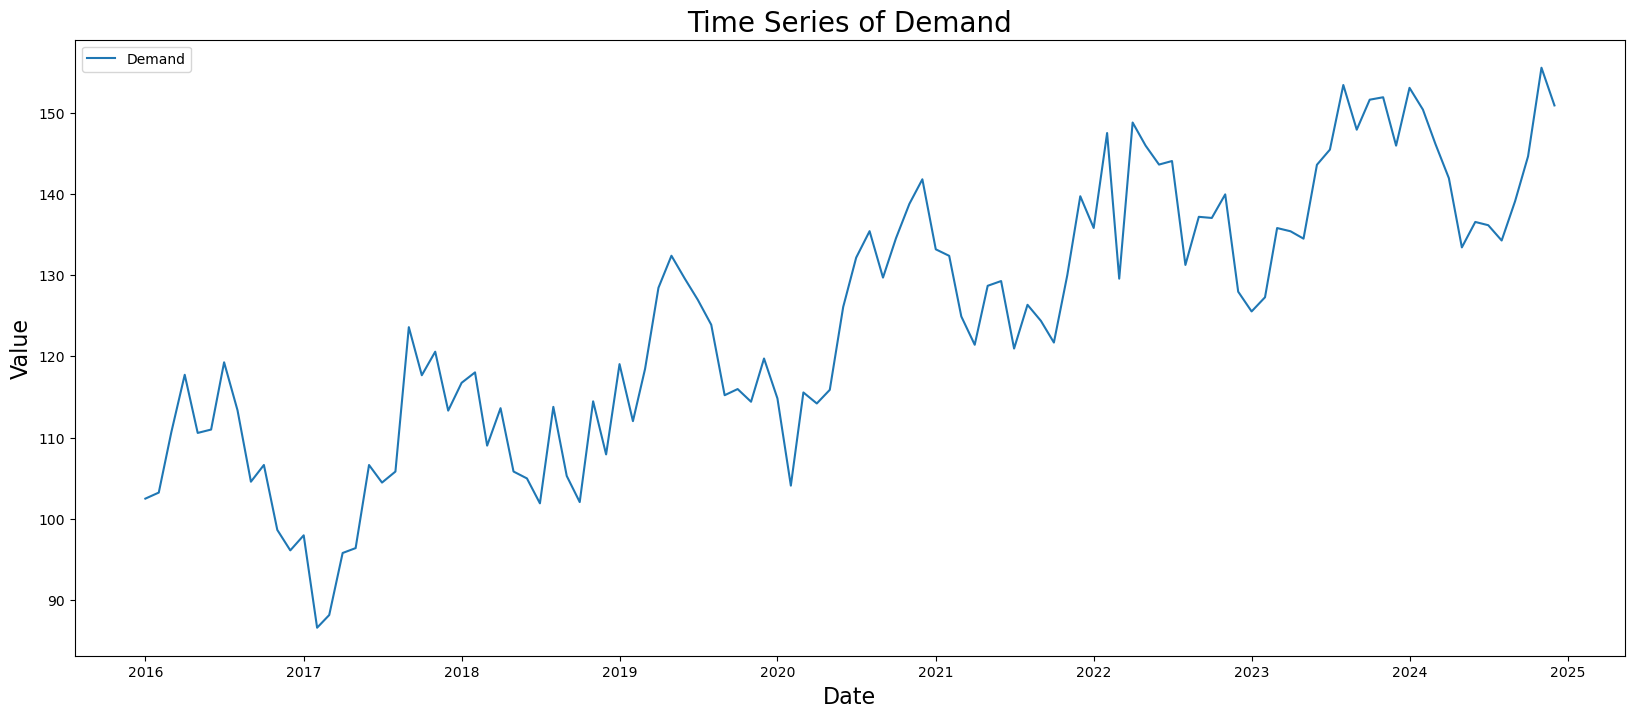

In [5]:
plt.figure(figsize=(20, 8))
plt.plot(df['Demand'], label='Demand')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Value', fontsize=16)
plt.title('Time Series of Demand', fontsize=20)
plt.legend()
plt.show()

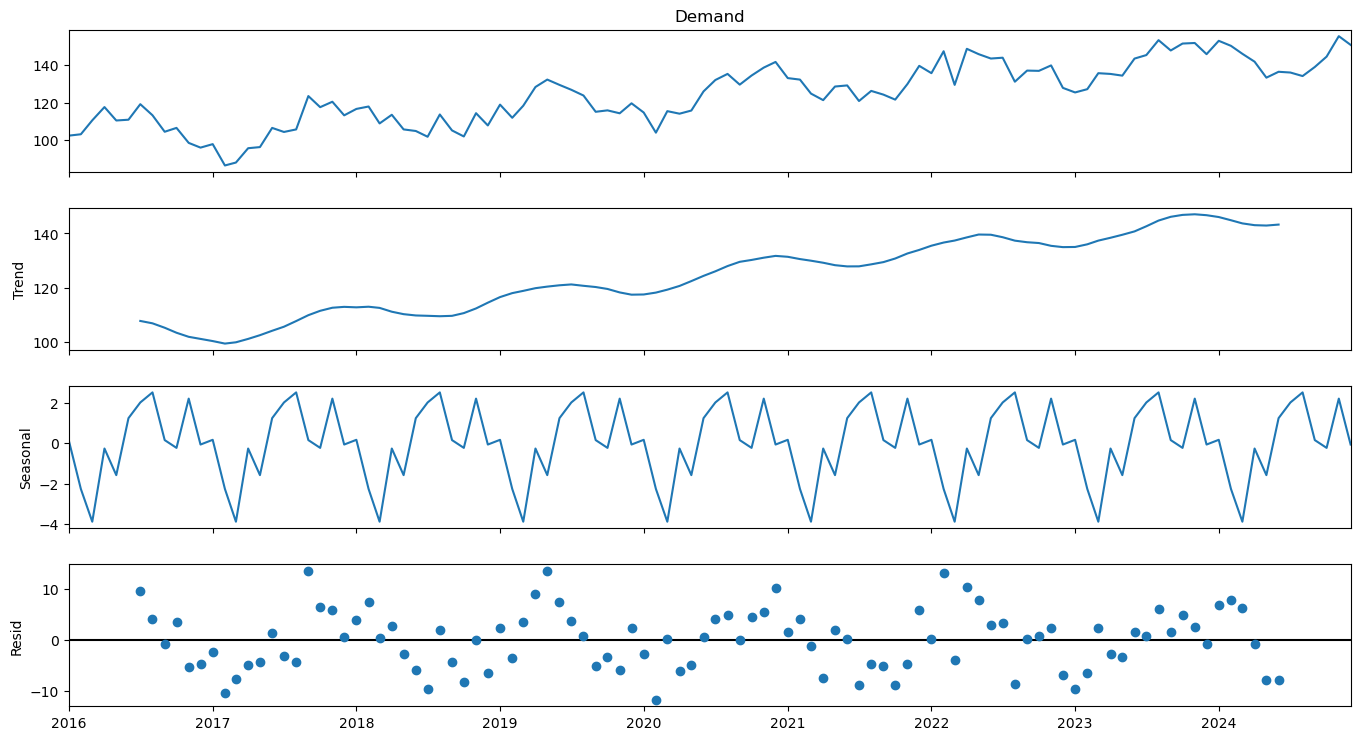

In [6]:
# -------------------------------------------------
# Decompose the series into trend, seasonal, noise
# -------------------------------------------------
decompose_result = seasonal_decompose(df['Demand'])
fig = decompose_result.plot()
fig.set_size_inches(15, 8)
plt.show()

### Check Autocorrelation (ACF & PACF)

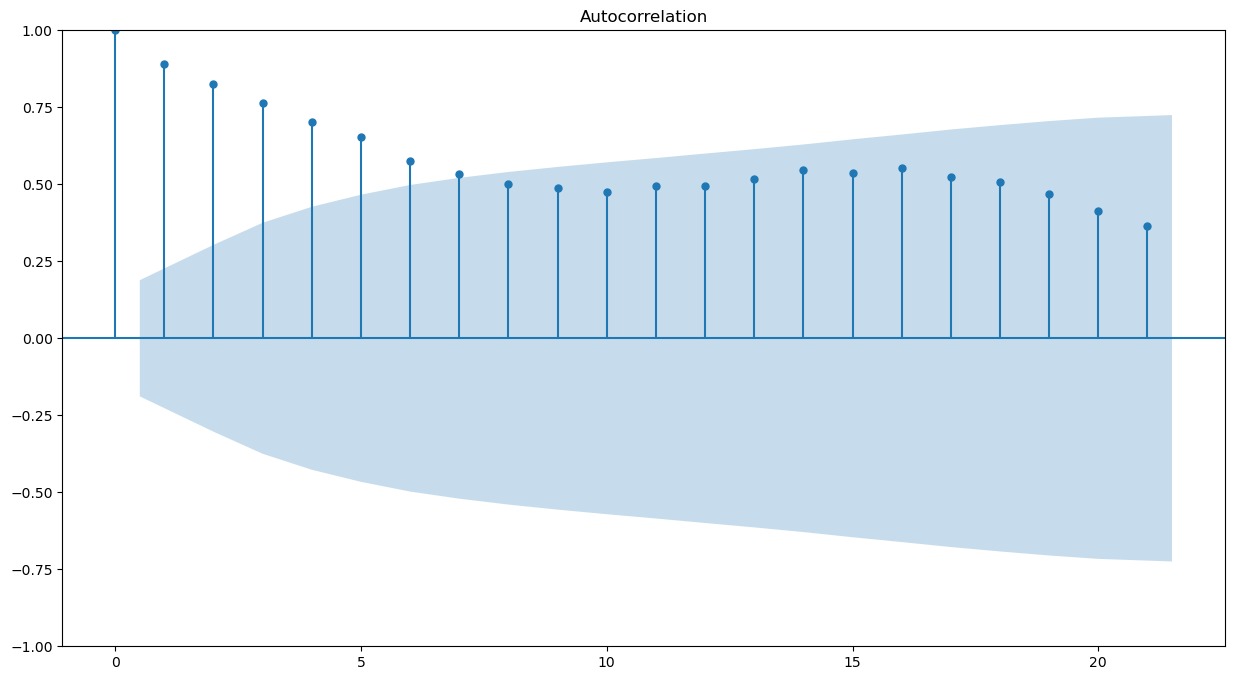

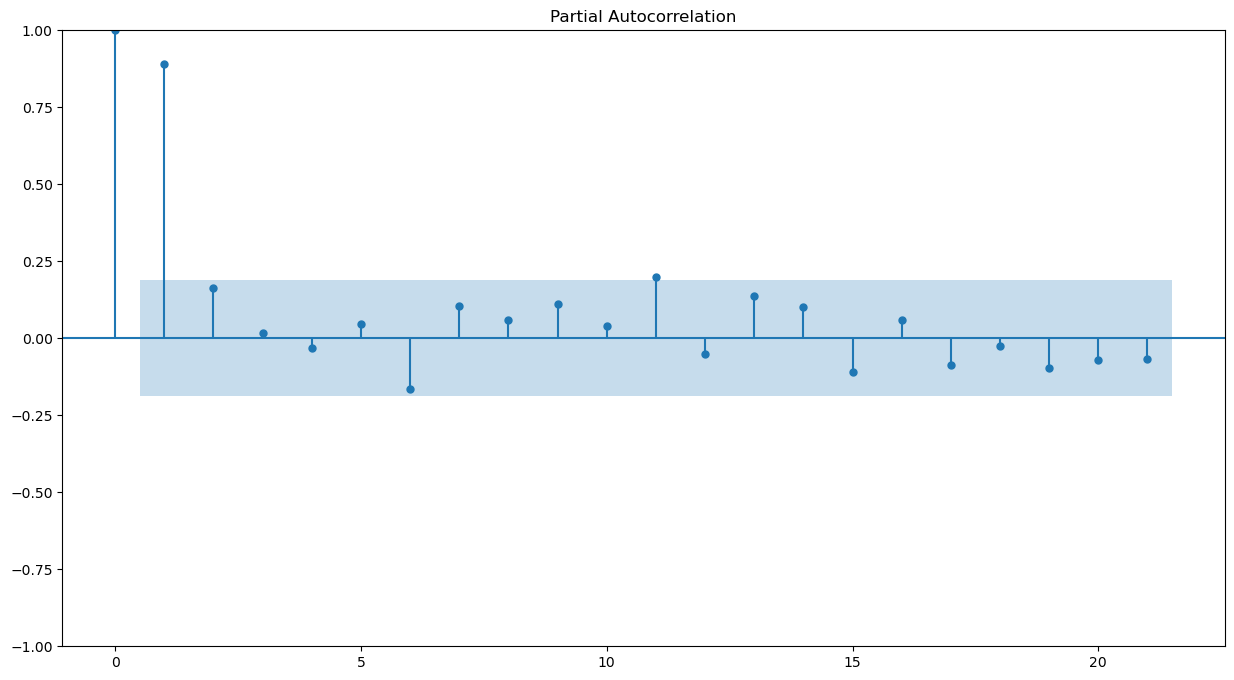

In [7]:
fig_acf = plot_acf(df['Demand'].values)
fig_acf.set_size_inches(15, 8)

fig_pacf = plot_pacf(df['Demand'].values)
fig_pacf.set_size_inches(15, 8)
plt.show()

### Perform Augmented Dickey-Fuller Test (Stationarity Check)

In [8]:
adf_test = adfuller(df['Demand'])
print(f'ADF Test Statistic: {adf_test[0]:.4f}')
print(f'p-value: {adf_test[1]:.4f}')
print(f'Critical Values: {adf_test[4]}')

ADF Test Statistic: -0.1141
p-value: 0.9480
Critical Values: {'1%': -3.5019123847798657, '5%': -2.892815255482889, '10%': -2.583453861475781}


### Apply Holt-Winters Triple Exponential Smoothing

In [9]:
holt_winter_model = ExponentialSmoothing(df['Demand'], seasonal_periods=12, trend='add', seasonal='mul').fit(optimized=True)
df['Forecast'] = holt_winter_model.fittedvalues
print("\nMonthly Model Parameters:\n", holt_winter_model.params_formatted)


Monthly Model Parameters:
                      name         param  optimized
smoothing_level     alpha  7.635386e-01       True
smoothing_trend      beta  2.734297e-11       True
smoothing_seasonal  gamma  2.882707e-12       True
initial_level         l.0  9.687899e+01       True
initial_trend         b.0  4.148641e-01       True
initial_seasons.0     s.0  1.062456e+00       True
initial_seasons.1     s.1  1.047323e+00       True
initial_seasons.2     s.2  1.034387e+00       True
initial_seasons.3     s.3  1.066845e+00       True
initial_seasons.4     s.4  1.050456e+00       True
initial_seasons.5     s.5  1.071459e+00       True
initial_seasons.6     s.6  1.068742e+00       True
initial_seasons.7     s.7  1.069168e+00       True
initial_seasons.8     s.8  1.055217e+00       True
initial_seasons.9     s.9  1.059333e+00       True
initial_seasons.10   s.10  1.086848e+00       True
initial_seasons.11   s.11  1.064025e+00       True


### Plot observed vs forecast

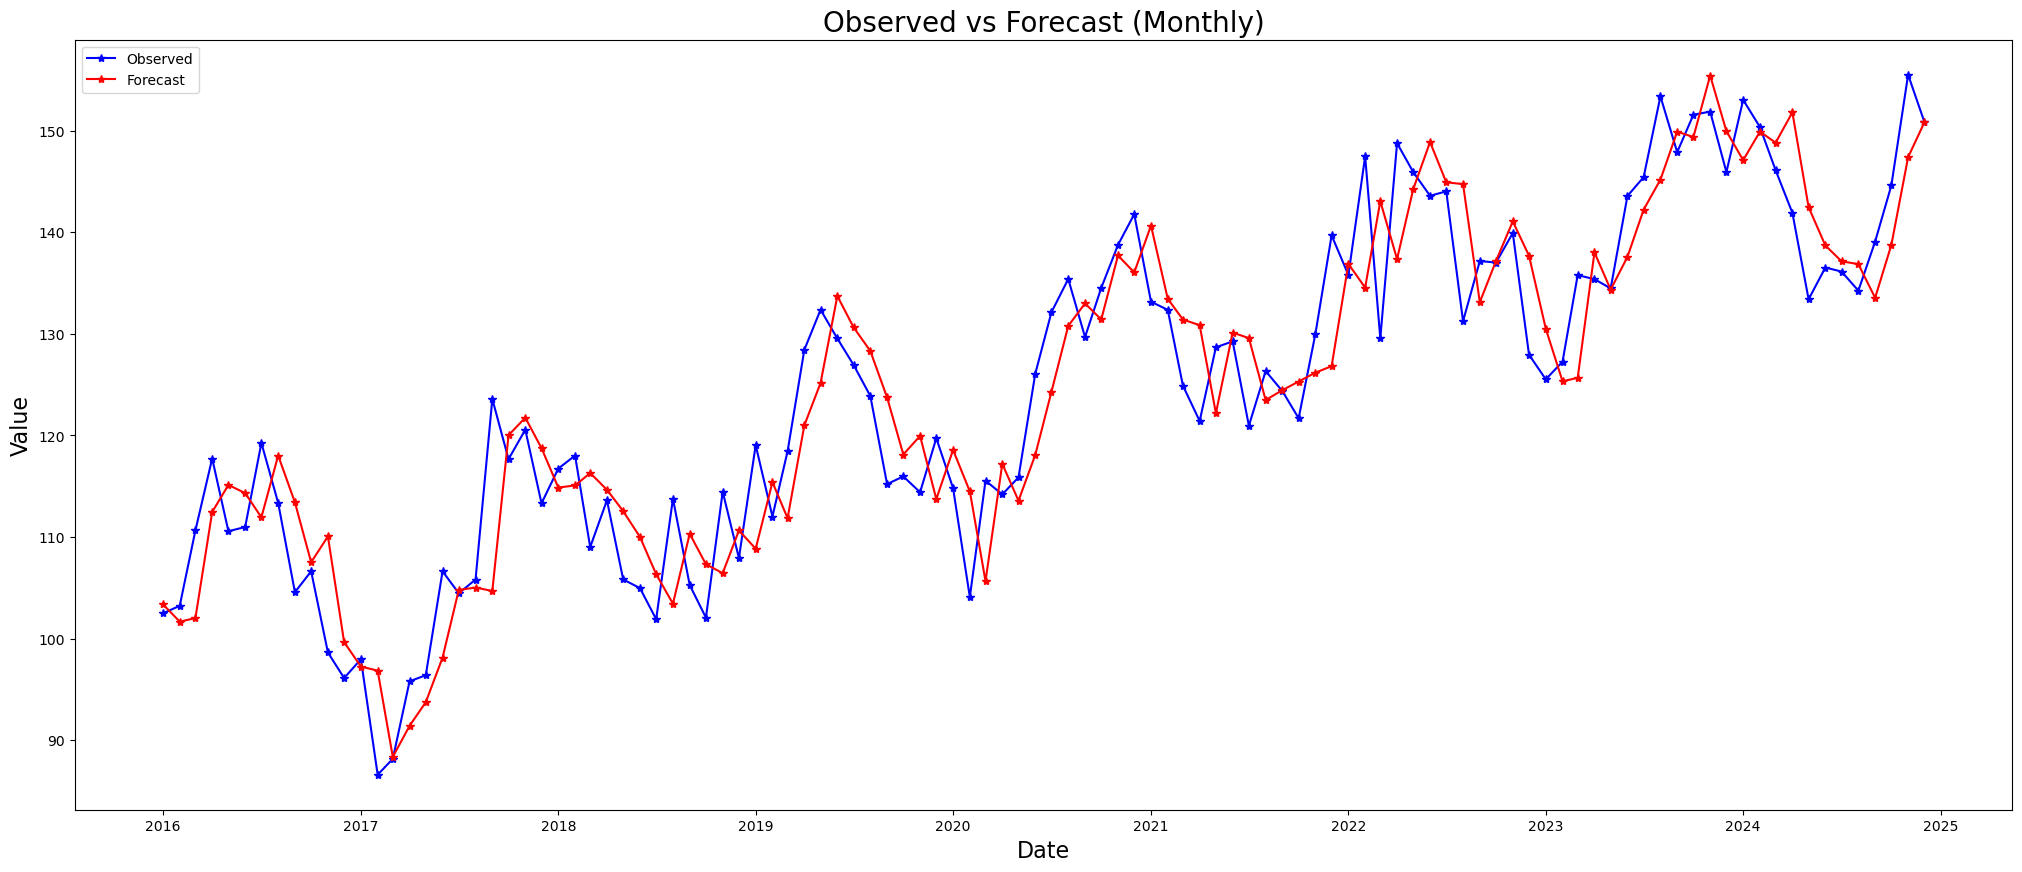

In [10]:
plt.figure(figsize=(25, 10))
plt.plot(df['Demand'], '-*', color='blue', label='Observed')
plt.plot(df['Forecast'], '-*', color='red', label='Forecast')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Value', fontsize=16)
plt.title('Observed vs Forecast (Monthly)', fontsize=20)
plt.legend(loc='best')
plt.show()

### Forecasting errors

In [11]:
mse = MSE(df['Demand'], df['Forecast'])
mape = MAPE(df['Demand'], df['Forecast'])
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape * 100:.2f}%')

Mean Squared Error (MSE): 39.71
Mean Absolute Percentage Error (MAPE): 4.17%


### Forecast future values

In [12]:
future_prediction = holt_winter_model.forecast(30)  # Forecast next 30 months
print("Future Forecast:\n", future_prediction)

Future Forecast:
 2025-01-01    151.076022
2025-02-01    149.358730
2025-03-01    147.943020
2025-04-01    153.027938
2025-05-01    151.112959
2025-06-01    154.578824
2025-07-01    154.630147
2025-08-01    155.135395
2025-09-01    153.548904
2025-10-01    154.587355
2025-11-01    159.053397
2025-12-01    156.154935
2026-01-01    156.365318
2026-02-01    154.572690
2026-03-01    153.092579
2026-04-01    158.339086
2026-05-01    156.342519
2026-06-01    159.912943
2026-07-01    159.950737
2026-08-01    160.458108
2026-09-01    158.802164
2026-10-01    159.861107
2026-11-01    164.464127
2026-12-01    161.452047
2027-01-01    161.654615
2027-02-01    159.786651
2027-03-01    158.242138
2027-04-01    163.650234
2027-05-01    161.572078
2027-06-01    165.247062
Freq: MS, dtype: float64


### Combine fitted values with forecast

In [13]:
pred_combined = pd.concat([df['Forecast'], future_prediction])

### Plot combined forecast

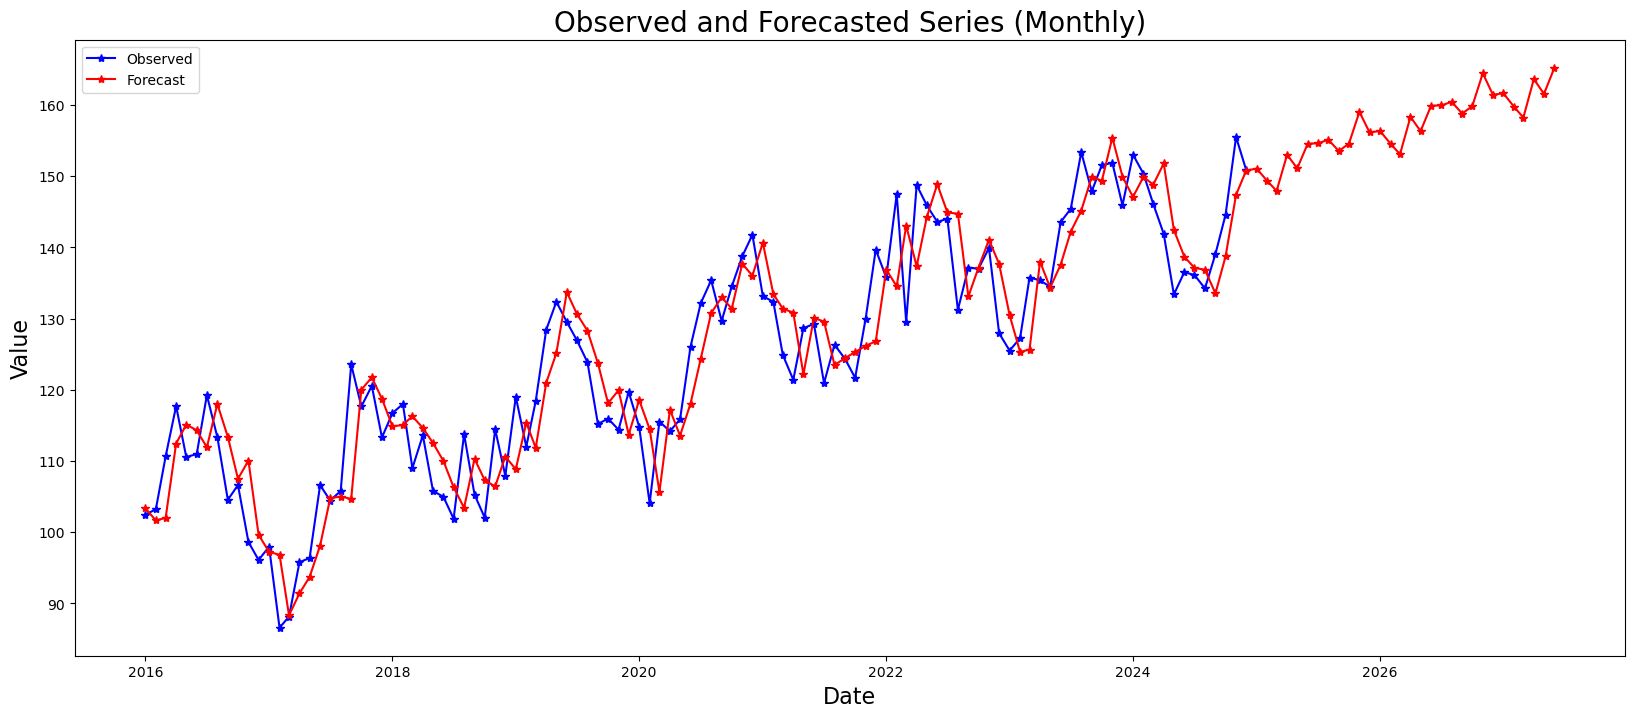

In [14]:
plt.figure(figsize=(20, 8))
plt.plot(df['Demand'], '-*', color='blue', label='Observed')
plt.plot(pred_combined, '-*', color='red', label='Forecast')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Value', fontsize=16)
plt.title('Observed and Forecasted Series (Monthly)', fontsize=20)
plt.legend(loc='best')
plt.show()

### Error metrics for forecast

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error


In [16]:
mse = mean_squared_error(df['Demand'], df['Forecast'])
mape = mean_absolute_percentage_error(df['Demand'], df['Forecast'])

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape * 100:.2f}%")

Mean Squared Error (MSE): 39.71
Mean Absolute Percentage Error (MAPE): 4.17%


### Test Different Seasonal & Trend Combinations

In [17]:
best_mape = float('inf')
best_mse = float('inf')
best_params = None

trend_options = ['add', 'mul']
seasonal_options = ['add', 'mul']

for period in range(2, 13):  # Test different seasonal periods
    for trend in trend_options:
        for seasonal in seasonal_options:
            model_test = ExponentialSmoothing(
                df['Demand'], seasonal_periods=period, trend=trend, seasonal=seasonal
            ).fit(optimized=True)
            
            df['HoltWinter'] = model_test.fittedvalues
            forecast_test = model_test.forecast(30)
            full_forecast_test = pd.concat([df['HoltWinter'], forecast_test])
            
            current_mape = MAPE(df['Demand'], df['HoltWinter'])
            current_mse = MSE(df['Demand'], df['HoltWinter'])

            if current_mape < best_mape:
                best_mape = current_mape
                best_params = (period, trend, seasonal)
                print(f'New Best MAPE: {best_mape:.4f} | Seasonal Period: {period} | Trend: {trend} | Seasonal: {seasonal}')

            if current_mse < best_mse:
                best_mse = current_mse
                print(f'New Best MSE: {best_mse:.4f} | Seasonal Period: {period} | Trend: {trend} | Seasonal: {seasonal}')

New Best MAPE: 0.0431 | Seasonal Period: 2 | Trend: add | Seasonal: add
New Best MSE: 43.1938 | Seasonal Period: 2 | Trend: add | Seasonal: add
New Best MSE: 43.1692 | Seasonal Period: 2 | Trend: add | Seasonal: mul
New Best MAPE: 0.0431 | Seasonal Period: 2 | Trend: mul | Seasonal: add
New Best MAPE: 0.0430 | Seasonal Period: 3 | Trend: add | Seasonal: add
New Best MSE: 42.9240 | Seasonal Period: 3 | Trend: add | Seasonal: add
New Best MAPE: 0.0428 | Seasonal Period: 3 | Trend: add | Seasonal: mul
New Best MSE: 42.8156 | Seasonal Period: 3 | Trend: add | Seasonal: mul
New Best MAPE: 0.0427 | Seasonal Period: 3 | Trend: mul | Seasonal: mul
New Best MAPE: 0.0427 | Seasonal Period: 4 | Trend: add | Seasonal: add
New Best MSE: 42.7749 | Seasonal Period: 4 | Trend: add | Seasonal: add
New Best MAPE: 0.0423 | Seasonal Period: 5 | Trend: add | Seasonal: add
New Best MSE: 41.2058 | Seasonal Period: 5 | Trend: add | Seasonal: add
New Best MAPE: 0.0422 | Seasonal Period: 6 | Trend: add | Season

### Apply Best Holt-Winters Model

In [18]:
best_period, best_trend, best_seasonal = best_params
best_holt_winter_model = ExponentialSmoothing(df['Demand'], seasonal_periods=best_period, trend=best_trend, seasonal=best_seasonal).fit(optimized=True)

In [19]:
df['HoltWinterBest'] = best_holt_winter_model.fittedvalues
future_forecast_best = best_holt_winter_model.forecast(30)
full_forecast_best = pd.concat([df['HoltWinterBest'], future_forecast_best])

### Plot Final Best Model Forecast

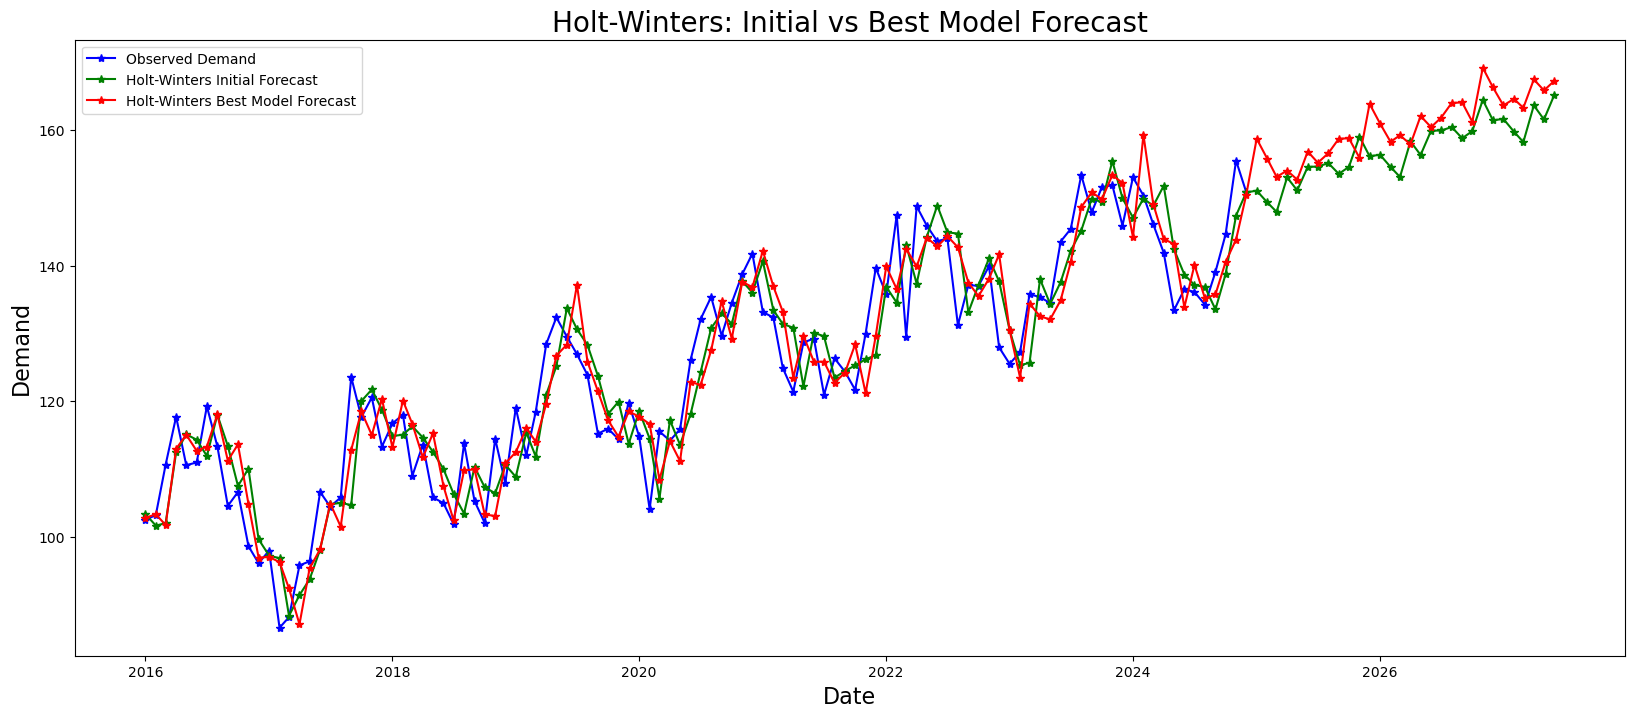

In [20]:
plt.figure(figsize=(20, 8))
plt.plot(df['Demand'], '-*', color='blue', label='Observed Demand')
plt.plot(pred_combined, '-*', color='green', label='Holt-Winters Initial Forecast')
plt.plot(full_forecast_best, '-*', color='red', label='Holt-Winters Best Model Forecast')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Demand', fontsize=16)
plt.title('Holt-Winters: Initial vs Best Model Forecast', fontsize=20)
plt.legend(loc='best')
plt.show()